# K-Means Clustering



- K Means allows us to define the required number of clusters
- we first start by taking an arbitrary number of k. Let’s say we take k=3 (k is choosen from **elbow method**)
- Algorithm chooses three random points as the centroid
- It also computes Euclidean distances from the centroid to all other data points
- The algorithm after measuring the distances of all the data points from the centroid associates each data point with a centroid based on its proximity
- To measure how good the three clusters are seperated, we use **Silhouette Score**

In [58]:
# Importing Libraries

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image


In [59]:
# Lets Take another Dataset : IRIS Dataset
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Preparing Data
Here we have the target variable ‘Type’.

We need to remove the target variable, used to work in an unsupervised learning

The iloc function is used to get the features we require.

We also use .values function to get an array of the dataset.

Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

In [60]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values

Now we will separate the target variable from the original dataset and again convert it to an array by using numpy

In [61]:
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

{0: 50, 1: 50, 2: 50}

(2.0, 4.5)

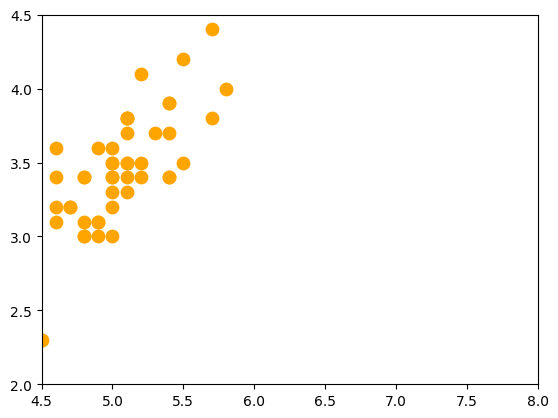

In [62]:
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1],
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

(2.0, 4.5)

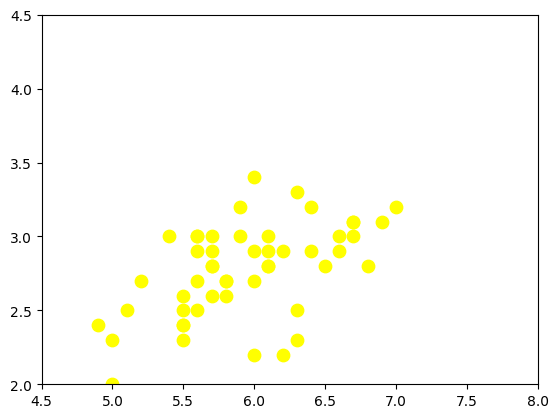

In [63]:
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1],
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

(2.0, 4.5)

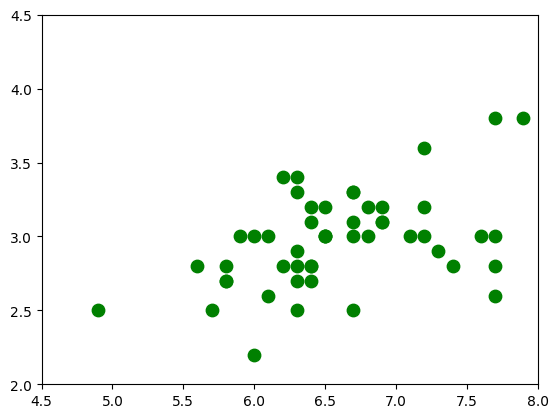

In [64]:
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In this Iris dataset, we have three classes (0,1,2)

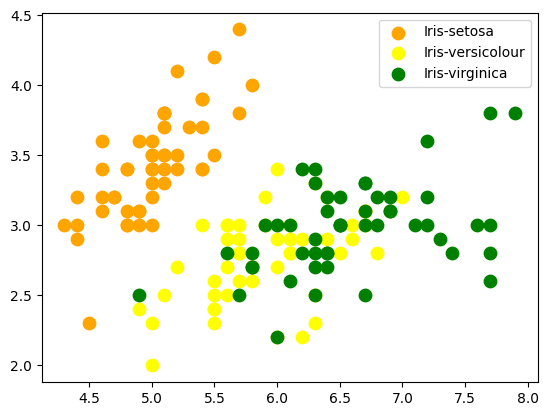

In [70]:
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1],
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1],
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()


We find that we have three classes with two types of Iris flowers overlapping each other

#### **Elbow Method**

The most crucial aspect of K-Means clustering is deciding the value of K. We do this by performing Elbow Analysis

- In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS(Within-Cluster Sum of Square)
- **WCSS is the sum of squared distance between each point and the centroid in a cluster**
- WCSS value is largest when K = 1.


For cluster = 1, SSE/WCSS is 681.3705999999996
For cluster = 2, SSE/WCSS is 152.34795176035797
For cluster = 3, SSE/WCSS is 78.851441426146
For cluster = 4, SSE/WCSS is 57.22847321428572
For cluster = 5, SSE/WCSS is 46.44618205128204
For cluster = 6, SSE/WCSS is 39.03998724608725
For cluster = 7, SSE/WCSS is 34.42019178628389
For cluster = 8, SSE/WCSS is 30.064593073593088
For cluster = 9, SSE/WCSS is 28.332569264069274
For cluster = 10, SSE/WCSS is 25.972596377306918


Text(0, 0.5, 'WCSS')

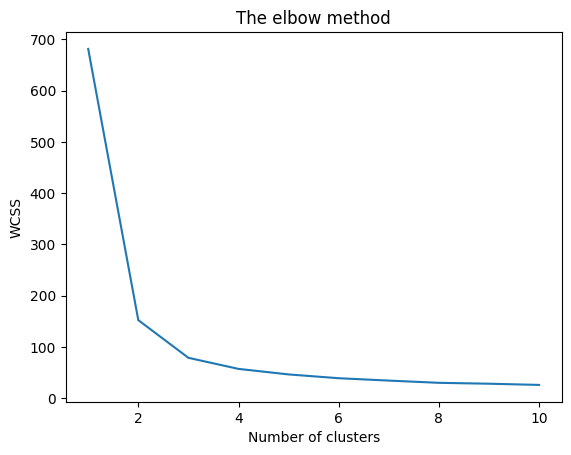

In [66]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


Cluster 1 means only one cluster, inshort variance of the dataset
Variance in Cluster 1 = 681

Cluster 2 means two cluster i.e, Variance in Cluster 2 = 152
Same way for Variance in Cluster 3 = 78

Variance in Cluster is also knows as Within Cluster Sum of Square (WCSS)
Normally as we increase number of clusters, within Sum of Square will decrease

In the elbow graph, we look for the points where the drop falls and the line smoothens out

In the above graph, this happens for when k=3.

Another way of understanding this is that we note the point at which the WCSS is less and try to find the number of clusters for our dataset.

We see that at the number of clusters = 3, WCSS is less than 100, which is good for us. So we take k=3.

We will check Silhouette Coefficient also for 3 and 4 Clusters respectively

In [67]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(iris_X)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


{0: 50, 1: 39, 2: 61}

#### Visualizing Output

####  **Silhouette Score**
- Clusters are well apart from each other as the silhouette score is closer to 1
- Silhouette Coefficient score is a metric used to calculate the goodness of a clustering technique
- Its value ranges from -1 to 1.
  1. **Score = 1: Means clusters are well apart** from each other and clearly distinguished.
  2. **Score = 0: Means clusters are indifferent**, or we can say that the distance between clusters is not significant.
  3. **Score = -1: Means clusters are assigned in the wrong way.**

Original Cluster Frequency {0: 50, 1: 50, 2: 50}
K Means Output Cluster Frequency {0: 50, 1: 39, 2: 61}
Silhouette Score for 3 Clusters 0.551191604619592




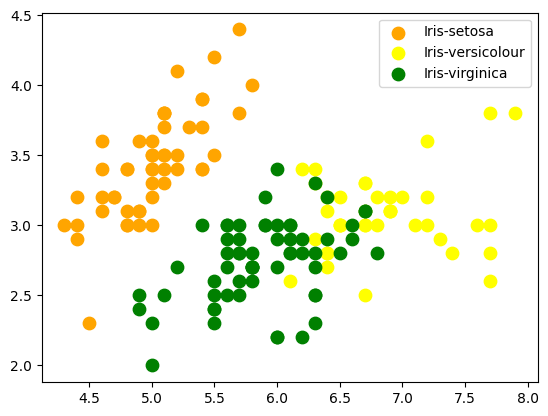

In [68]:
print('Original Cluster Frequency',freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
print('K Means Output Cluster Frequency',dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters',silhouette_score(iris_X,pred_kmeans))
print("\n")

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

plt.scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1],
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1],
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

 When compared to the original classes we find that the observations of the class label

"1" has been correctly formed into a separate well-defined cluster

However, for the other two classes, clusters are not as correct.

This is mainly because, in the original dataset, these two class labels were overlapping each other which makes it difficult for the clustering algorithm as it works best for clear neat separate observations.

Still, the clusters have been formed, more or less correctly

Silhouette Score = 0.55 which is not bad enough (should be tend to 1)

In [69]:
# If we take 4 Cluster to Check Silhouetter Score
cluster_Kmeans = KMeans(n_clusters=4)
model_kmeans = cluster_Kmeans.fit(iris_X)
labels_1 = model_kmeans.labels_
print("Silhouette Score for 4 Cluster")
print(silhouette_score(iris_X,labels_1))
print('\n')

wcss = []

for k in range(2,20):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(iris_X)
  label = kmeans.labels_
  sil_coeff = silhouette_score(iris_X,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

Silhouette Score for 4 Cluster
0.49805050499728737


For cluster= 2, Silhouette Coefficient is 0.6810461692117462
For cluster= 3, Silhouette Coefficient is 0.5185675688773279
For cluster= 4, Silhouette Coefficient is 0.49805050499728737
For cluster= 5, Silhouette Coefficient is 0.48874888709310566
For cluster= 6, Silhouette Coefficient is 0.44191517029004124
For cluster= 7, Silhouette Coefficient is 0.4548746422580854
For cluster= 8, Silhouette Coefficient is 0.30765043406593756
For cluster= 9, Silhouette Coefficient is 0.3360824365813443
For cluster= 10, Silhouette Coefficient is 0.31766469887063636
For cluster= 11, Silhouette Coefficient is 0.3065304736634168
For cluster= 12, Silhouette Coefficient is 0.3031082617199165
For cluster= 13, Silhouette Coefficient is 0.2908480934195616
For cluster= 14, Silhouette Coefficient is 0.25791990231497325
For cluster= 15, Silhouette Coefficient is 0.25677811147510976
For cluster= 16, Silhouette Coefficient is 0.24247960159879103
For cluster= 17, 

As we can observe, the silhouette score is decreased from 0.51 to 0.49 when we increased the cluster from 3 to 4

Optimal number of cluster=3 as its silhouette score is greater than that of 4 clusters